In [68]:
import pandas as pd
import numpy as np

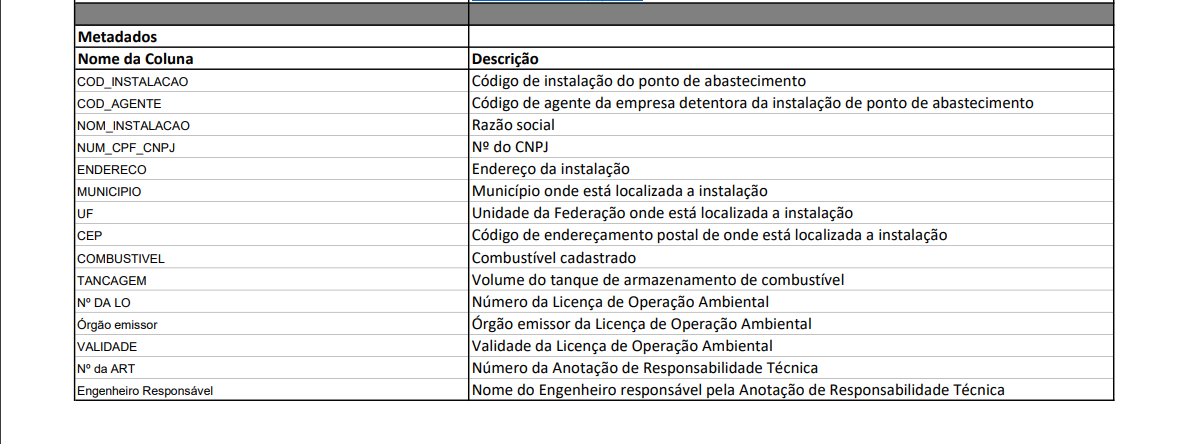

In [8]:
df = pd.read_csv('postos.txt', sep=';')
df.head()

C:\Users\Homeoffice\AppData\Local\Temp\ipykernel_24784\2228783543.py:1: DtypeWarning: Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('postos.txt', sep=';')


,COD_INSTALACAO,COD_AGENTE,NOM_INSTALACAO,NUM_CPF_CNPJ,DSC_ENDERECO,DSC_COMPLEMENTO,NUM_ENDERECO,MUNICIPIO,UF,CEP,COMBUSTIVEL,TANCAGEM,LICENCA,EMISSOR,VALIDADE,COD_ANOTACAO,COD_AGENTE_ENGENHEIRO,ENGENHEIRO
0,1258097.0,8037493658,Nelson Luis Krastel,3749365873,RUA ANTONIO BERNADES DA SILVA PRIMO,PREDIAL,50,PIRAJUBA,MG,38210000,ÓLEO DIESEL B S10 - COMUM,30,3EDE16D2D28686A3,ANP,30/06/2020,14201100000000046823,475964,LEANDRO LUIZ GOES BICALHO
1,1250693.0,5001568077,STERICYCLE GESTAO AMBIENTAL LTDA,1568077001520,Avenida Geraldo Potyguara Silveira Franco,,1000,MOGI MIRIM,SP,13803280,ÓLEO DIESEL B S10 - COMUM,15,ISENTO,ANP,04/04/2021,PE20180226556,356627,GABRIEL MENDES FONSECA DOS SANTOS
2,1258089.0,8084877086,GUILHERME OLIVEIRA,8487708625,RUA antonio bernades da silva primo,predial,50,PIRAJUBA,MG,38210000,ÓLEO DIESEL B S10 - COMUM,30,3ede16d2d28686a3,ANP,30/06/2020,14201100000000046823,475964,LEANDRO LUIZ GOES BICALHO
3,1251079.0,5010866549,AGENCIA LUCK VIAGENS E TURISMO LTDA,10866549000117,RUA PROJETADA 2,,338,JABOATAO DOS GUARARAPES,PE,54430585,ÓLEO DIESEL B S10 - COMUM,15,ISENTO,ANP,28/01/2020,PE20180341460,356627,GABRIEL MENDES FONSECA DOS SANTOS
4,1291884.0,5003912413,MATA NORTE ALIMENTOS LTDA,3912413000130,"ESTRADA DE ROSA E SILVA, KM 11",ENGENHO LIMOEIRINHO,S/N,TIMBAUBA,PE,55870000,ÓLEO DIESEL B S10 - COMUM,15,ISENTA,ANP,02/01/1900,SI12436267ICT001,564373,GABRIEL MENDES FONSECA DOS SANTOS


#### Entidades
- Instalação(Código, Nome, CPF_CNPJ, Endereço, Licença): 24787 instâncias  
- Endereço(Código, Instalação, Rua, Número, Complemento, Município): 2874  
instâncias 
- Combustível(Nome, Código, Tipo): 34 entidades
- Engenheiro(Código, Nome): 7600 entidades
- Licença(ID, Emissor, Validade): ?? entidades


In [3]:
df.columns

Index(['COD_INSTALACAO', 'COD_AGENTE', 'NOM_INSTALACAO', 'NUM_CPF_CNPJ',
       'DSC_ENDERECO', 'DSC_COMPLEMENTO', 'NUM_ENDERECO', 'MUNICIPIO', 'UF',
       'CEP', 'COMBUSTIVEL', 'TANCAGEM', 'LICENCA', 'EMISSOR', 'VALIDADE',
       'COD_ANOTACAO', 'COD_AGENTE_ENGENHEIRO', 'ENGENHEIRO'],
      dtype='object')

In [10]:
# Instalaçao
cols_instalacao = ['COD_INSTALACAO', 'NOM_INSTALACAO', 'NUM_CPF_CNPJ', 'LICENCA']
instalacao = df[cols_instalacao]
instalacao.head()

,COD_INSTALACAO,NOM_INSTALACAO,NUM_CPF_CNPJ,LICENCA
0,1258097.0,Nelson Luis Krastel,3749365873,3EDE16D2D28686A3
1,1250693.0,STERICYCLE GESTAO AMBIENTAL LTDA,1568077001520,ISENTO
2,1258089.0,GUILHERME OLIVEIRA,8487708625,3ede16d2d28686a3
3,1251079.0,AGENCIA LUCK VIAGENS E TURISMO LTDA,10866549000117,ISENTO
4,1291884.0,MATA NORTE ALIMENTOS LTDA,3912413000130,ISENTA


In [82]:
# Engenheiro
cols_engenheiro = ['COD_AGENTE_ENGENHEIRO', 'ENGENHEIRO']
engenheiro_ = df[cols_engenheiro]
engenheiro = df[['ENGENHEIRO', 'MUNICIPIO', 'UF',]].groupby('ENGENHEIRO').last()
engenheiro.reset_index(inplace=True)
engenheiro['aux'] = np.arange(0, engenheiro.shape[0])
engenheiro['PK'] = engenheiro.apply(lambda x: f'E{x.aux}', axis=1)
engenheiro.drop(columns={'aux'}, inplace=True)
engenheiro.tail()

,ENGENHEIRO,MUNICIPIO,UF,PK
7595,ÁLVARO K DE A SANTI,TERESINA,PI,E7595
7596,Áurea do Prado Benevenuto,ITAUNA,MG,E7596
7597,ÉDSON ALVES DE SOUSA,SAO LUIS,MA,E7597
7598,ÉRICO RODRIGUES PAULO DOS SANTOS PEGO,GUARULHOS,SP,E7598
7599,ÍTALO SOUSA CORREA,ANANINDEUA,PA,E7599


In [34]:
# Combustivel
cols_combustivel = ['COMBUSTIVEL']
combustivel = df[cols_combustivel]
combustivel.head()

,COMBUSTIVEL
0,ÓLEO DIESEL B S10 - COMUM
1,ÓLEO DIESEL B S10 - COMUM
2,ÓLEO DIESEL B S10 - COMUM
3,ÓLEO DIESEL B S10 - COMUM
4,ÓLEO DIESEL B S10 - COMUM


In [78]:
# localidade
cols_localidade = ['NUM_localidade', 'MUNICIPIO', 'UF', 'CEP', 'DSC_localidade', 'DSC_COMPLEMENTO']
localidade = df[cols_localidade]
localidade['aux'] = np.arange(0, engenheiro.shape[0])
localidade['PK'] = localidade.apply(lambda x: f'E{x.aux}', axis=1)
localidade.drop(columns={'aux'}, inplace=True)
localidade.head()

,NUM_ENDERECO,MUNICIPIO,UF,CEP,DSC_ENDERECO,DSC_COMPLEMENTO,PK
0,50,PIRAJUBA,MG,38210000,RUA ANTONIO BERNADES DA SILVA PRIMO,PREDIAL,E1
1,1000,MOGI MIRIM,SP,13803280,Avenida Geraldo Potyguara Silveira Franco,,E2
2,50,PIRAJUBA,MG,38210000,RUA antonio bernades da silva primo,predial,E3
3,338,JABOATAO DOS GUARARAPES,PE,54430585,RUA PROJETADA 2,,E4
4,S/N,TIMBAUBA,PE,55870000,"ESTRADA DE ROSA E SILVA, KM 11",ENGENHO LIMOEIRINHO,E5


In [79]:
# Licenca
cols_licenca = ['LICENCA', 'EMISSOR', 'VALIDADE', 'COD_ANOTACAO']
licenca = df[cols_licenca]
licenca['aux'] = np.arange(1, licenca.shape[0] + 1)
licenca['PK'] = licenca.apply(lambda x: f'L{x.aux}', axis=1)
licenca.drop(columns={'aux'}, inplace=True)
licenca.head()

,LICENCA,EMISSOR,VALIDADE,COD_ANOTACAO,PK
0,3EDE16D2D28686A3,ANP,30/06/2020,14201100000000046823,L1
1,ISENTO,ANP,04/04/2021,PE20180226556,L2
2,3ede16d2d28686a3,ANP,30/06/2020,14201100000000046823,L3
3,ISENTO,ANP,28/01/2020,PE20180341460,L4
4,ISENTA,ANP,02/01/1900,SI12436267ICT001,L5


#### Adicionando atributos ...

In [41]:
import requests

In [53]:
response = requests.get("https://h-apigateway.conectagov.estaleiro.serpro.gov.br/oauth2/jwt-token", headers={"x-cpf-usuario": "08485695631"})
response.status_code

403